# Downtime Data Dashboard

This notebook generates a synthetic downtime dataset and visualizes KPIs and charts.

You can toggle between a **fixed dataset** (reproducible) or a **random dataset** generated each run.

It shows:
- KPIs summary
- Static charts (Matplotlib + Seaborn)
- Interactive charts (Plotly)
- SQL schema and sample queries inline

In [16]:
# Toggle: set to True for fixed dataset, False for random dataset
FIXED_DATA = True

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# !pip install seaborn

import seaborn as sns
import plotly.express as px

# For consistent plot styles
sns.set_theme(style="whitegrid")

# Seed for reproducibility if fixed data
if FIXED_DATA:
    np.random.seed(42)

# Synthetic dataset parameters
num_events = 300
machines = ['M-101', 'M-102', 'M-103', 'M-104', 'M-105']
reasons = ['Power Failure', 'Mechanical', 'Software Bug', 'Operator Error']
technicians = ['John', 'Sarah', 'Mike', 'Anna']

# Generate dataset
data = {
    'event_id': range(1, num_events + 1),
    'machine_id': np.random.choice(machines, num_events),
    'start_time': pd.date_range('2025-01-01', periods=num_events, freq='8H'),
    'failure_reason': np.random.choice(reasons, num_events),
    'technician': np.random.choice(technicians, num_events),
}

df = pd.DataFrame(data)
df['end_time'] = df['start_time'] + pd.to_timedelta(np.random.randint(1, 8, num_events), unit='h')
df['downtime_hours'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 3600
df['week_number'] = df['start_time'].dt.isocalendar().week.astype(int)

df

,event_id,machine_id,start_time,failure_reason,technician,end_time,downtime_hours,week_number
0,1,M-104,2025-01-01 00:00:00,Power Failure,Mike,2025-01-01 02:00:00,2.0,1
1,2,M-105,2025-01-01 08:00:00,Operator Error,Sarah,2025-01-01 12:00:00,4.0,1
2,3,M-103,2025-01-01 16:00:00,Power Failure,Anna,2025-01-01 23:00:00,7.0,1
3,4,M-105,2025-01-02 00:00:00,Power Failure,John,2025-01-02 07:00:00,7.0,1
4,5,M-105,2025-01-02 08:00:00,Mechanical,Anna,2025-01-02 10:00:00,2.0,1
...,...,...,...,...,...,...,...,...
295,296,M-105,2025-04-09 08:00:00,Mechanical,Sarah,2025-04-09 13:00:00,5.0,15
296,297,M-105,2025-04-09 16:00:00,Power Failure,John,2025-04-09 17:00:00,1.0,15
297,298,M-103,2025-04-10 00:00:00,Software Bug,John,2025-04-10 01:00:00,1.0,15
298,299,M-104,2025-04-10 08:00:00,Operator Error,Anna,2025-04-10 09:00:00,1.0,15


## KPI Summary

In [35]:
# Calculate KPIs
total_downtime = df['downtime_hours'].sum()
avg_mttr = df['downtime_hours'].mean()
total_failures = len(df)

fail_counts = df['failure_reason'].value_counts()
weekly_downtime = df.groupby('week_number', as_index=False)['downtime_hours'].sum()
machine_downtime = df.groupby('machine_id', as_index=False)['downtime_hours'].sum()

print(f"Total Downtime (hours): {total_downtime:.1f}")
print(f"Average MTTR (hours): {avg_mttr:.2f}")
print(f"Total Failure Events: {total_failures}")

Total Downtime (hours): 1209.0
Average MTTR (hours): 4.03
Total Failure Events: 300


## Charts (Matplotlib + Seaborn)

/var/folders/jb/hlwrybss3zz6qg_t3n7g9dbm0000gn/T/ipykernel_54363/3245950005.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




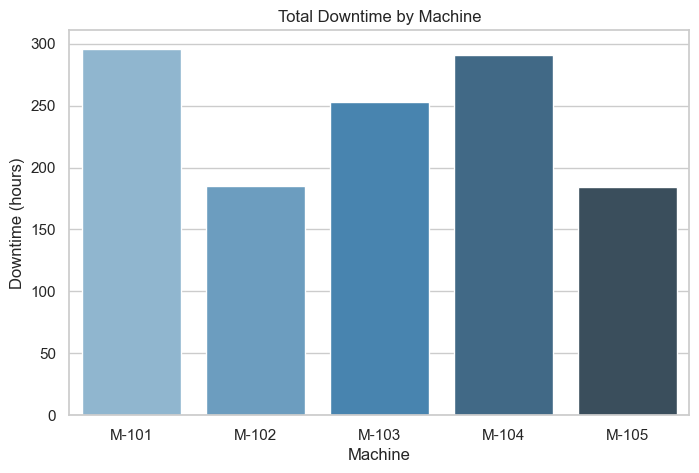

In [28]:
# Bar chart: Total Downtime by Machine
plt.figure(figsize=(8,5))
sns.barplot(data=machine_downtime, x='machine_id', y='downtime_hours', palette='Blues_d')
plt.title('Total Downtime by Machine')
plt.xlabel('Machine')
plt.ylabel('Downtime (hours)')
plt.show()

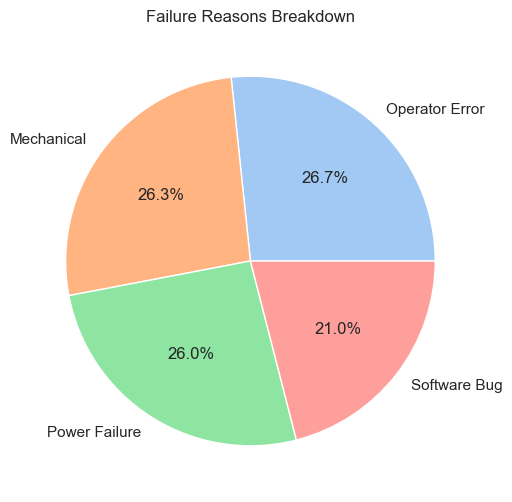

In [29]:
# Pie chart: Failure Reasons Breakdown
plt.figure(figsize=(6,6))
plt.pie(fail_counts, labels=fail_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Failure Reasons Breakdown')
plt.show()

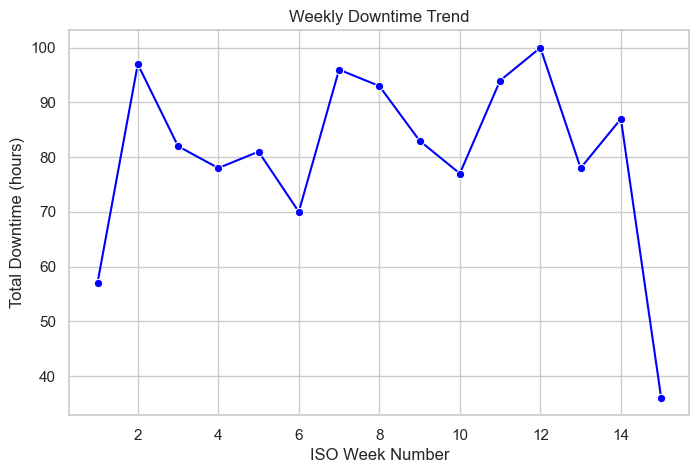

In [30]:
# Line chart: Weekly Downtime Trend
plt.figure(figsize=(8,5))
sns.lineplot(data=weekly_downtime, x='week_number', y='downtime_hours', marker='o', color='blue')
plt.title('Weekly Downtime Trend')
plt.xlabel('ISO Week Number')
plt.ylabel('Total Downtime (hours)')
plt.show()

/var/folders/jb/hlwrybss3zz6qg_t3n7g9dbm0000gn/T/ipykernel_54363/4060201359.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




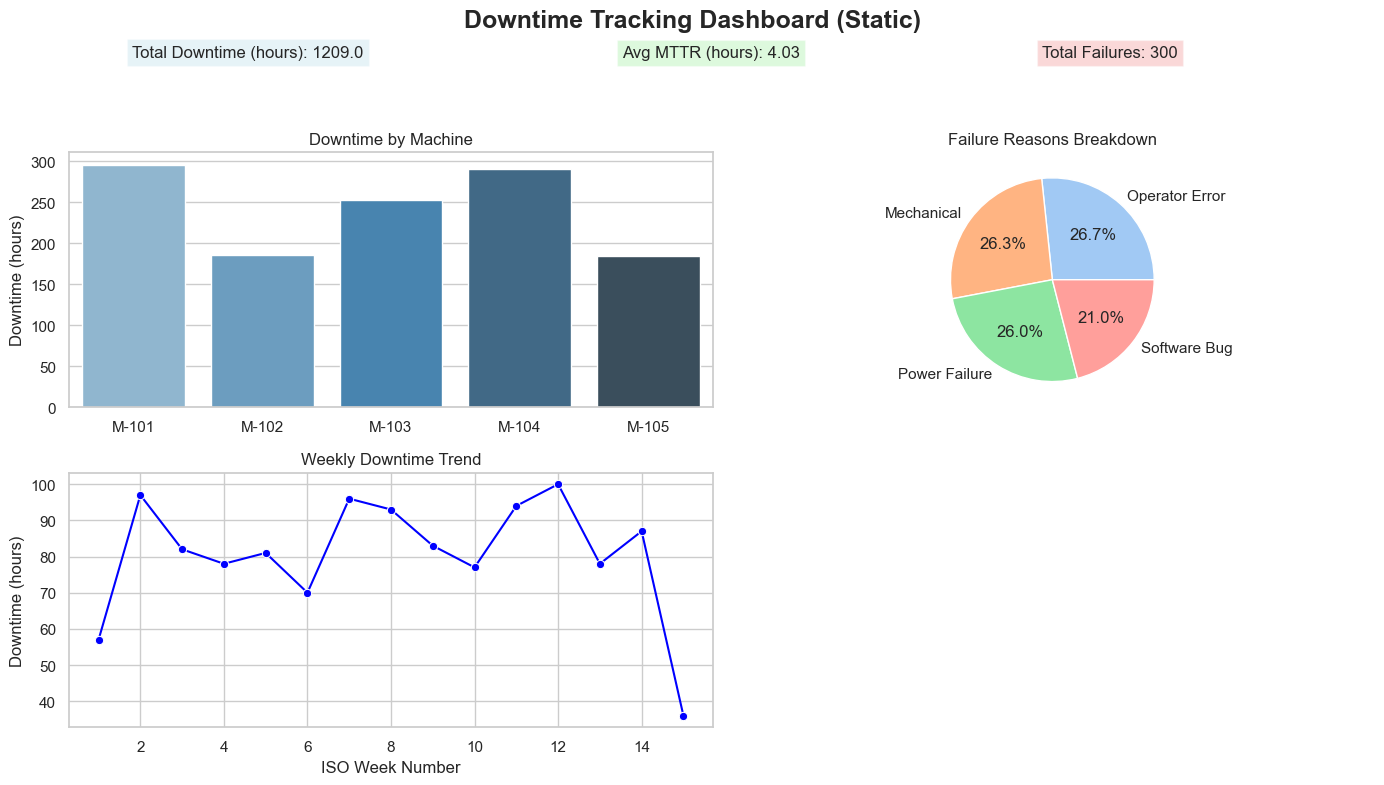

In [ ]:
# Combined Dashboard Overview 
fig, axes = plt.subplots(2, 2, figsize=(14,8))
fig.suptitle('Downtime Tracking Dashboard (Static)', fontsize=18, fontweight='bold')

fig.text(0.1, 0.92, f'Total Downtime (hours): {total_downtime:.1f}', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.3))
fig.text(0.45, 0.92, f'Avg MTTR (hours): {avg_mttr:.2f}', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.3))
fig.text(0.75, 0.92, f'Total Failures: {total_failures}', fontsize=12, bbox=dict(facecolor='lightcoral', alpha=0.3))

sns.barplot(data=machine_downtime, x='machine_id', y='downtime_hours', ax=axes[0,0], palette='Blues_d')
axes[0,0].set_title('Downtime by Machine')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Downtime (hours)')

axes[0,1].pie(fail_counts, labels=fail_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[0,1].set_title('Failure Reasons Breakdown')

sns.lineplot(data=weekly_downtime, x='week_number', y='downtime_hours', marker='o', ax=axes[1,0], color='blue')
axes[1,0].set_title('Weekly Downtime Trend')
axes[1,0].set_xlabel('ISO Week Number')
axes[1,0].set_ylabel('Downtime (hours)')

axes[1,1].axis('off')

plt.tight_layout(rect=[0,0,1,0.9])
plt.show()



## SQL Schema and Sample Queries

In [ ]:
sql_schema = '''
CREATE TABLE downtime_events (
    event_id INT PRIMARY KEY,
    machine_id VARCHAR(10),
    start_time DATETIME,
    end_time DATETIME,
    failure_reason VARCHAR(50),
    technician VARCHAR(50),
    downtime_hours DECIMAL(10,2)
);
'''
print(sql_schema)

In [ ]:
import sqlite3

# Creating in-memory SQLite DB and connect
conn = sqlite3.connect(':memory:')

# Loading DataFrame as SQL table
df.to_sql('downtime_events', conn, index=False, if_exists='replace')

# Running a SQL query, Total downtime per machine
query = '''
SELECT machine_id, COUNT(*) AS total_failures, SUM(downtime_hours) AS total_downtime
FROM downtime_events
GROUP BY machine_id
ORDER BY total_downtime DESC;
'''

result = pd.read_sql_query(query, conn)
print(result)


  machine_id  total_failures  total_downtime
0      M-101              69           296.0
1      M-104              74           291.0
2      M-103              63           253.0
3      M-102              46           185.0
4      M-105              48           184.0


In [36]:
# Running a SQL query,Top failure reasons
query2 = '''
SELECT failure_reason, COUNT(*) AS occurrences
FROM downtime_events
GROUP BY failure_reason
ORDER BY occurrences DESC;
'''

result2 = pd.read_sql_query(query2, conn)
print(result2)

   failure_reason  occurrences
0  Operator Error           80
1      Mechanical           79
2   Power Failure           78
3    Software Bug           63
